In [1]:
import tensorflow
import keras
import csv
import numpy
import matplotlib.pyplot as plot

random_seed = 0

#loading data
Path = "https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv"
dataset = numpy.loadtxt(Path, delimiter=",", skiprows=1)

#shuffling data
numpy.random.seed(random_seed)
numpy.random.shuffle(dataset)

#loading inputs and outputs
X1 = dataset[:,5:6] #Leptin
X2 = dataset[:,6:7] #Adiponectin
X3 = dataset[:,0:1] #Age
X4 = dataset[:,7:8] #Resistin
X5 = dataset[:,2:3] #Glucose
X6 = dataset[:,4:5] #HOMA
X7 = dataset[:,8:9] #MCP.1
X8 = dataset[:,3:4] #Insulin
X9 = dataset[:,1:2] #BMI
Y = dataset[:,9:10] #Classification

#normalization_function
def normalization(x):
    return (x - min(x)) / (max(x) - min(x))

#normalization
X1 = normalization(X1)
X2 = normalization(X2)
X3 = normalization(X3)
X4 = normalization(X4)
X5 = normalization(X5)
X6 = normalization(X6)
X7 = normalization(X7)
X8 = normalization(X8)
X9 = normalization(X9)

#load training data (Y)
Y = Y - 1

Using TensorFlow backend.


In [2]:
#setting a random seed
numpy.random.seed(random_seed)

#constructing input layers
input_layer_X1 = keras.layers.Input(shape=(1, ), name='input_layer_X1')
input_layer_X2 = keras.layers.Input(shape=(1, ), name='input_layer_X2')
input_layer_X3 = keras.layers.Input(shape=(1, ), name='input_layer_X3')
input_layer_X4 = keras.layers.Input(shape=(1, ), name='input_layer_X4')
input_layer_X5 = keras.layers.Input(shape=(1, ), name='input_layer_X5')
input_layer_X6 = keras.layers.Input(shape=(1, ), name='input_layer_X6')
input_layer_X7 = keras.layers.Input(shape=(1, ), name='input_layer_X7')
input_layer_X8 = keras.layers.Input(shape=(1, ), name='input_layer_X8')
input_layer_X9 = keras.layers.Input(shape=(1, ), name='input_layer_X9')

#constructing hidden layers
merge_layer = keras.layers.concatenate([input_layer_X1, input_layer_X2, input_layer_X3, input_layer_X4, input_layer_X5, input_layer_X6, input_layer_X7, input_layer_X8, input_layer_X9], name='merge_layer')
hidden_layer_1 = keras.layers.Dense(9, activation = 'linear', name='hidden_layer_1')(merge_layer)
hidden_layer_2 = keras.layers.Dense(9, activation = 'tanh', name='hidden_layer_2')(hidden_layer_1)
hidden_layer_3 = keras.layers.Dense(9, activation = 'tanh', name='hidden_layer_3')(hidden_layer_2)

#constructing output layer
output_layer = keras.layers.Dense(1, activation = 'sigmoid', name='output_layer')(hidden_layer_3)

#constructing the model of neural network
model = keras.models.Model(inputs=[input_layer_X1, input_layer_X2, input_layer_X3, input_layer_X4, input_layer_X5, input_layer_X6, input_layer_X7, input_layer_X8, input_layer_X9], outputs=output_layer)
model.summary()

#setting loss function and optimizer
model.compile(loss='binary_crossentropy', optimizer = 'nadam', metrics = ['acc', keras.metrics.AUC()])

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer_X1 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
input_layer_X2 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
input_layer_X3 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
input_layer_X4 (InputLayer)     (None, 1)            0                                            
____________________________________________________________________________________________

In [3]:
#training the model of neural network
train_history = model.fit([X1, X2, X3, X4, X5, X6, X7, X8, X9], Y, validation_split=0.2, epochs = 700, batch_size = 1)

Train on 92 samples, validate on 24 samples
Epoch 1/700
92/92 [==============================] - 1s 8ms/step - loss: 0.7051 - acc: 0.5761 - auc_1: 0.5226 - val_loss: 0.6572 - val_acc: 0.7083 - val_auc_1: 0.6857
Epoch 2/700
92/92 [==============================] - 0s 3ms/step - loss: 0.6647 - acc: 0.6196 - auc_1: 0.6702 - val_loss: 0.6154 - val_acc: 0.7500 - val_auc_1: 0.7714
Epoch 3/700
92/92 [==============================] - 0s 4ms/step - loss: 0.6372 - acc: 0.6848 - auc_1: 0.7202 - val_loss: 0.5824 - val_acc: 0.7500 - val_auc_1: 0.8250
Epoch 4/700
92/92 [==============================] - 0s 3ms/step - loss: 0.6063 - acc: 0.6739 - auc_1: 0.7519 - val_loss: 0.5567 - val_acc: 0.7917 - val_auc_1: 0.8536
Epoch 5/700
92/92 [==============================] - 0s 3ms/step - loss: 0.5811 - acc: 0.7174 - auc_1: 0.7633 - val_loss: 0.5159 - val_acc: 0.7917 - val_auc_1: 0.8679
Epoch 6/700
92/92 [==============================] - 0s 3ms/step - loss: 0.5677 - acc: 0.6304 - auc_1: 0.7736 - val_loss:

92/92 [==============================] - 0s 3ms/step - loss: 0.4248 - acc: 0.7935 - auc_1: 0.8752 - val_loss: 0.6606 - val_acc: 0.6667 - val_auc_1: 0.8821
Epoch 50/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4091 - acc: 0.8043 - auc_1: 0.9040 - val_loss: 0.5804 - val_acc: 0.8333 - val_auc_1: 0.8786
Epoch 51/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4293 - acc: 0.7826 - auc_1: 0.8790 - val_loss: 0.6335 - val_acc: 0.7083 - val_auc_1: 0.8857
Epoch 52/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4193 - acc: 0.8152 - auc_1: 0.8798 - val_loss: 0.6632 - val_acc: 0.6667 - val_auc_1: 0.8786
Epoch 53/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4142 - acc: 0.8043 - auc_1: 0.8924 - val_loss: 0.6088 - val_acc: 0.7083 - val_auc_1: 0.8714
Epoch 54/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4046 - acc: 0.8261 - auc_1: 0.8886 - val_loss: 0.6337 - val_acc: 0.7083 - val_auc_1: 0.8679
Epoch

Epoch 98/700
92/92 [==============================] - 0s 4ms/step - loss: 0.3160 - acc: 0.8152 - auc_1: 0.9350 - val_loss: 0.5744 - val_acc: 0.7917 - val_auc_1: 0.8429
Epoch 99/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3022 - acc: 0.8478 - auc_1: 0.9498 - val_loss: 0.5498 - val_acc: 0.7917 - val_auc_1: 0.8536
Epoch 100/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3016 - acc: 0.8370 - auc_1: 0.9490 - val_loss: 0.5639 - val_acc: 0.7917 - val_auc_1: 0.8500
Epoch 101/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3076 - acc: 0.8261 - auc_1: 0.9445 - val_loss: 0.5240 - val_acc: 0.8333 - val_auc_1: 0.8571
Epoch 102/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3028 - acc: 0.8587 - auc_1: 0.9417 - val_loss: 0.5867 - val_acc: 0.7917 - val_auc_1: 0.8500
Epoch 103/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2750 - acc: 0.9022 - auc_1: 0.9593 - val_loss: 0.6650 - val_acc: 0.7083 - val_au

92/92 [==============================] - 0s 3ms/step - loss: 0.2262 - acc: 0.9130 - auc_1: 0.9707 - val_loss: 0.5540 - val_acc: 0.7917 - val_auc_1: 0.8786
Epoch 147/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2293 - acc: 0.9130 - auc_1: 0.9667 - val_loss: 0.5397 - val_acc: 0.7917 - val_auc_1: 0.8714
Epoch 148/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2169 - acc: 0.9348 - auc_1: 0.9755 - val_loss: 0.5649 - val_acc: 0.7500 - val_auc_1: 0.8643
Epoch 149/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2036 - acc: 0.9130 - auc_1: 0.9790 - val_loss: 0.5407 - val_acc: 0.7500 - val_auc_1: 0.8786
Epoch 150/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2240 - acc: 0.9348 - auc_1: 0.9721 - val_loss: 0.5712 - val_acc: 0.7500 - val_auc_1: 0.8536
Epoch 151/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2194 - acc: 0.9239 - auc_1: 0.9700 - val_loss: 0.5809 - val_acc: 0.7500 - val_auc_1: 0.8500


92/92 [==============================] - 0s 4ms/step - loss: 0.1479 - acc: 0.9457 - auc_1: 0.9852 - val_loss: 0.7371 - val_acc: 0.7083 - val_auc_1: 0.8250
Epoch 195/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1399 - acc: 0.9674 - auc_1: 0.9876 - val_loss: 0.6961 - val_acc: 0.7500 - val_auc_1: 0.8107
Epoch 196/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1362 - acc: 0.9674 - auc_1: 0.9869 - val_loss: 0.7029 - val_acc: 0.7500 - val_auc_1: 0.8143
Epoch 197/700
92/92 [==============================] - 0s 5ms/step - loss: 0.1447 - acc: 0.9565 - auc_1: 0.9888 - val_loss: 0.7634 - val_acc: 0.7500 - val_auc_1: 0.8107
Epoch 198/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1368 - acc: 0.9674 - auc_1: 0.9845 - val_loss: 0.6922 - val_acc: 0.7083 - val_auc_1: 0.8107
Epoch 199/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1343 - acc: 0.9565 - auc_1: 0.9910 - val_loss: 0.7730 - val_acc: 0.7083 - val_auc_1: 0.8036


92/92 [==============================] - 0s 4ms/step - loss: 0.0822 - acc: 0.9783 - auc_1: 0.9974 - val_loss: 0.8726 - val_acc: 0.7083 - val_auc_1: 0.7643
Epoch 243/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0683 - acc: 0.9783 - auc_1: 0.9993 - val_loss: 0.8254 - val_acc: 0.7500 - val_auc_1: 0.7893
Epoch 244/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0739 - acc: 0.9783 - auc_1: 0.9990 - val_loss: 0.8494 - val_acc: 0.7500 - val_auc_1: 0.7857
Epoch 245/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0667 - acc: 0.9783 - auc_1: 0.9990 - val_loss: 0.8702 - val_acc: 0.7083 - val_auc_1: 0.7679
Epoch 246/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0845 - acc: 0.9674 - auc_1: 0.9974 - val_loss: 0.9035 - val_acc: 0.7083 - val_auc_1: 0.8000
Epoch 247/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0930 - acc: 0.9674 - auc_1: 0.9976 - val_loss: 0.8499 - val_acc: 0.7917 - val_auc_1: 0.7643


92/92 [==============================] - 0s 3ms/step - loss: 0.0325 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.1564 - val_acc: 0.7917 - val_auc_1: 0.7500
Epoch 291/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0281 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.1365 - val_acc: 0.7917 - val_auc_1: 0.7464
Epoch 292/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0459 - acc: 0.9891 - auc_1: 1.0000 - val_loss: 1.1628 - val_acc: 0.7500 - val_auc_1: 0.7571
Epoch 293/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0273 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.1774 - val_acc: 0.7917 - val_auc_1: 0.7536
Epoch 294/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1076 - acc: 0.9783 - auc_1: 0.9914 - val_loss: 1.0725 - val_acc: 0.7500 - val_auc_1: 0.7571
Epoch 295/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0269 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.0588 - val_acc: 0.7917 - val_auc_1: 0.7893


Epoch 338/700
92/92 [==============================] - 0s 4ms/step - loss: 0.3188 - acc: 0.9239 - auc_1: 0.9512 - val_loss: 1.2121 - val_acc: 0.7917 - val_auc_1: 0.7857
Epoch 339/700
92/92 [==============================] - 0s 5ms/step - loss: 0.0943 - acc: 0.9783 - auc_1: 0.9921 - val_loss: 1.2752 - val_acc: 0.7500 - val_auc_1: 0.7607
Epoch 340/700
92/92 [==============================] - 0s 5ms/step - loss: 0.0569 - acc: 0.9783 - auc_1: 0.9990 - val_loss: 1.2956 - val_acc: 0.7917 - val_auc_1: 0.7179
Epoch 341/700
92/92 [==============================] - 0s 5ms/step - loss: 0.0158 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.3133 - val_acc: 0.7917 - val_auc_1: 0.7179
Epoch 342/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0134 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.3159 - val_acc: 0.7917 - val_auc_1: 0.7214
Epoch 343/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0128 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.3219 - val_acc: 0.7917 - val_

92/92 [==============================] - 0s 4ms/step - loss: 0.0063 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.4979 - val_acc: 0.7917 - val_auc_1: 0.7429
Epoch 387/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0066 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.5041 - val_acc: 0.7917 - val_auc_1: 0.7321
Epoch 388/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0061 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.5117 - val_acc: 0.7917 - val_auc_1: 0.7321
Epoch 389/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0065 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.5306 - val_acc: 0.7917 - val_auc_1: 0.7321
Epoch 390/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0059 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.5334 - val_acc: 0.7917 - val_auc_1: 0.7286
Epoch 391/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0065 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.5420 - val_acc: 0.7917 - val_auc_1: 0.7321


92/92 [==============================] - 0s 4ms/step - loss: 0.0037 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.7215 - val_acc: 0.7917 - val_auc_1: 0.7429
Epoch 435/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0040 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.7177 - val_acc: 0.7917 - val_auc_1: 0.7357
Epoch 436/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0055 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.8167 - val_acc: 0.7500 - val_auc_1: 0.7071
Epoch 437/700
92/92 [==============================] - 0s 4ms/step - loss: 0.3106 - acc: 0.9457 - auc_1: 0.9655 - val_loss: 1.5223 - val_acc: 0.7083 - val_auc_1: 0.7464
Epoch 438/700
92/92 [==============================] - 0s 4ms/step - loss: 0.3509 - acc: 0.8913 - auc_1: 0.9593 - val_loss: 1.6494 - val_acc: 0.7500 - val_auc_1: 0.7179
Epoch 439/700
92/92 [==============================] - 1s 6ms/step - loss: 0.0187 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.6511 - val_acc: 0.7917 - val_auc_1: 0.7179


92/92 [==============================] - 0s 3ms/step - loss: 0.0033 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.8894 - val_acc: 0.7917 - val_auc_1: 0.7536
Epoch 483/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1912 - acc: 0.9674 - auc_1: 0.9752 - val_loss: 2.1588 - val_acc: 0.6667 - val_auc_1: 0.7250
Epoch 484/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2943 - acc: 0.9239 - auc_1: 0.9638 - val_loss: 1.7006 - val_acc: 0.7500 - val_auc_1: 0.7071
Epoch 485/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2746 - acc: 0.9130 - auc_1: 0.9667 - val_loss: 1.5335 - val_acc: 0.7917 - val_auc_1: 0.7607
Epoch 486/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0534 - acc: 0.9783 - auc_1: 0.9981 - val_loss: 1.3346 - val_acc: 0.7917 - val_auc_1: 0.7357
Epoch 487/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0604 - acc: 0.9783 - auc_1: 0.9976 - val_loss: 1.4128 - val_acc: 0.7917 - val_auc_1: 0.7500


92/92 [==============================] - 0s 3ms/step - loss: 0.0020 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.8597 - val_acc: 0.7917 - val_auc_1: 0.7286
Epoch 531/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0019 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.8770 - val_acc: 0.7917 - val_auc_1: 0.7286
Epoch 532/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0021 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.8852 - val_acc: 0.7917 - val_auc_1: 0.7286
Epoch 533/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0019 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.8929 - val_acc: 0.7917 - val_auc_1: 0.7286
Epoch 534/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0020 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.8893 - val_acc: 0.7917 - val_auc_1: 0.7286
Epoch 535/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0018 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.9045 - val_acc: 0.7917 - val_auc_1: 0.7286


92/92 [==============================] - 0s 3ms/step - loss: 0.0020 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.6482 - val_acc: 0.7917 - val_auc_1: 0.7500
Epoch 579/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0020 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.6615 - val_acc: 0.7917 - val_auc_1: 0.7500
Epoch 580/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0019 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.6787 - val_acc: 0.7917 - val_auc_1: 0.7500
Epoch 581/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0019 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.6907 - val_acc: 0.7917 - val_auc_1: 0.7500
Epoch 582/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0019 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.6933 - val_acc: 0.7917 - val_auc_1: 0.7500
Epoch 583/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0019 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.7113 - val_acc: 0.7917 - val_auc_1: 0.7500


92/92 [==============================] - 0s 3ms/step - loss: 0.0014 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.8737 - val_acc: 0.7917 - val_auc_1: 0.7357
Epoch 627/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0014 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.8791 - val_acc: 0.7917 - val_auc_1: 0.7464
Epoch 628/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0014 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.8835 - val_acc: 0.7917 - val_auc_1: 0.7464
Epoch 629/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0014 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.8890 - val_acc: 0.7917 - val_auc_1: 0.7464
Epoch 630/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0014 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.8926 - val_acc: 0.7917 - val_auc_1: 0.7464
Epoch 631/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0013 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.8970 - val_acc: 0.7917 - val_auc_1: 0.7464


92/92 [==============================] - 0s 3ms/step - loss: 7.1659e-04 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.2150 - val_acc: 0.7917 - val_auc_1: 0.7464
Epoch 675/700
92/92 [==============================] - 0s 3ms/step - loss: 6.7490e-04 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.2188 - val_acc: 0.7917 - val_auc_1: 0.7464
Epoch 676/700
92/92 [==============================] - 0s 3ms/step - loss: 6.8836e-04 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.2292 - val_acc: 0.7917 - val_auc_1: 0.7464
Epoch 677/700
92/92 [==============================] - 0s 4ms/step - loss: 7.1674e-04 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.2447 - val_acc: 0.7917 - val_auc_1: 0.7571
Epoch 678/700
92/92 [==============================] - 0s 4ms/step - loss: 6.6963e-04 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.2543 - val_acc: 0.7917 - val_auc_1: 0.7464
Epoch 679/700
92/92 [==============================] - 0s 4ms/step - loss: 6.4065e-04 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.2627 - val_acc: 0.7

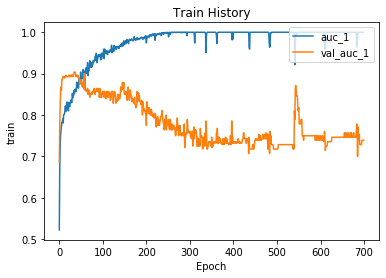

[array([[ 0.9734497 ,  1.0721098 , -0.73662454, -1.8177592 , -0.778409  ,
         0.33488172,  0.8140833 , -0.276615  , -0.18442324],
       [ 0.32345772, -0.60317785, -0.43707845,  0.33604324,  0.36595893,
         1.0007935 ,  1.1869309 , -1.8085326 ,  0.08096401],
       [ 0.17306775,  0.4155604 ,  0.82757926, -0.02547674, -0.09393729,
        -1.3838017 ,  1.7368501 ,  0.2596948 , -0.35657588],
       [-0.17568742,  1.9046465 , -2.1183496 , -0.5574882 , -2.1486504 ,
        -0.27503362,  0.13903147,  0.7472016 ,  1.6877944 ],
       [-1.1701248 ,  0.19686744, -1.6147951 , -0.7546039 , -1.0058459 ,
         0.9801385 , -0.46932554, -0.15867043,  1.3618879 ],
       [-0.7044733 ,  0.7291656 ,  0.03576811,  0.57487136,  0.21304533,
        -1.1341861 , -0.42042556,  0.6126313 ,  1.0218407 ],
       [-0.25085   ,  0.32000142, -0.28401583,  0.12142867,  0.38654226,
         0.6045966 , -1.9478116 ,  0.1886006 , -0.30461374],
       [-0.59565693,  0.39079762,  0.75795954,  1.3514132 ,  

In [4]:
#drawing the lines of losses and metrics
def show_train_history(train_history, x1, x2):
    plot.plot(train_history.history[x1])
    plot.plot(train_history.history[x2])
    plot.title('Train History')
    plot.ylabel('train')
    plot.xlabel('Epoch')
    plot.legend([x1, x2], loc = 'upper right')
    plot.show()

show_train_history(train_history, 'auc_1', 'val_auc_1')

#showing the weights in the model of neural network
print(model.get_weights())

In [5]:
#predicting the outputs of the model based on training data
predictions = model.predict([X1, X2, X3, X4, X5, X6, X7, X8, X9])
print(predictions)

[[2.93632242e-04]
 [9.99999285e-01]
 [9.92938697e-01]
 [1.94972672e-05]
 [6.22753100e-03]
 [9.99878407e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.86297846e-01]
 [9.99966979e-01]
 [7.36546644e-05]
 [1.86170859e-03]
 [1.00000000e+00]
 [2.29376121e-04]
 [1.59051258e-03]
 [9.99296904e-01]
 [2.70792923e-04]
 [9.94830310e-01]
 [1.00000000e+00]
 [9.99950051e-01]
 [3.38958111e-04]
 [3.13201715e-04]
 [4.47022589e-03]
 [9.99229431e-01]
 [1.00000000e+00]
 [9.99337018e-01]
 [9.98989999e-01]
 [9.99494910e-01]
 [1.25662073e-05]
 [1.00000000e+00]
 [2.35542189e-04]
 [1.18295808e-04]
 [7.84595904e-05]
 [2.15926149e-04]
 [4.63903234e-06]
 [9.99999881e-01]
 [9.99932170e-01]
 [9.93600368e-01]
 [9.84981179e-01]
 [9.99998689e-01]
 [9.99637008e-01]
 [9.99997973e-01]
 [6.17916696e-04]
 [1.73325505e-04]
 [2.79384025e-04]
 [9.99978065e-01]
 [9.98687685e-01]
 [9.98632133e-01]
 [9.98804808e-01]
 [1.75083740e-04]
 [2.58285786e-06]
 [9.97218370e-01]
 [1.98775233e-05]
 [7.36561415e-05]
 [3.10311884e-06]
 [4.446743